In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("./Mall_Customers.csv")
df.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
df.shape

(200, 3)

In [6]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df.dtypes

Age       int64
Income    int64
Score     int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     200 non-null    int64
 1   Income  200 non-null    int64
 2   Score   200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


143342.751571706


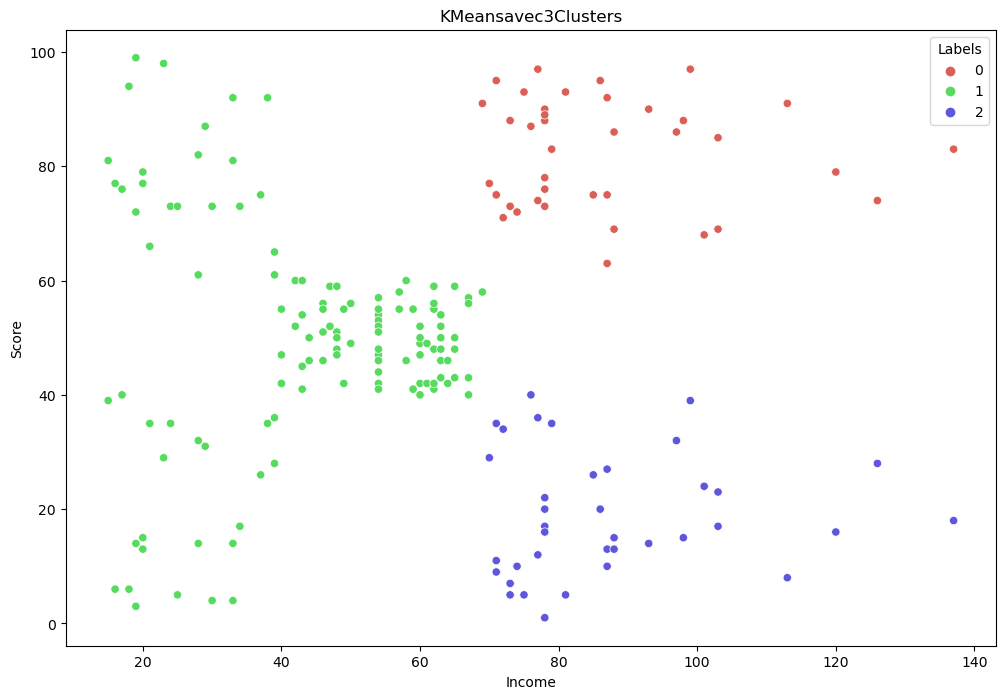

In [17]:
model=KMeans(n_clusters=3,n_init=10)
model.fit(df)
print(model.inertia_)

df['Labels']=model.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Income'],y=df['Score'],
hue=df['Labels'],palette=sns.color_palette('hls',3))
plt.title('KMeansavec3Clusters')
plt.show()

In [29]:
iniertia=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,n_init=10)
    model.fit(df)
    iniertia.append(model.inertia_)

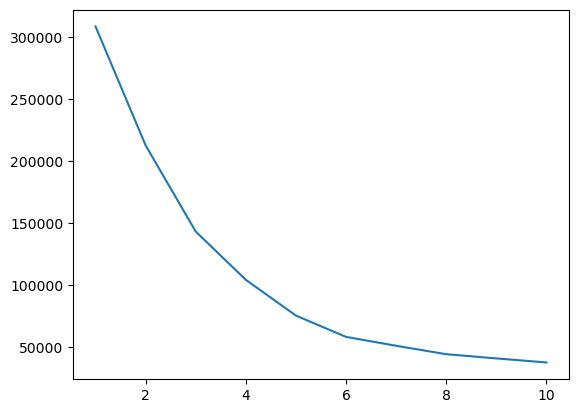

In [31]:
plt.plot(range(1,11),iniertia)

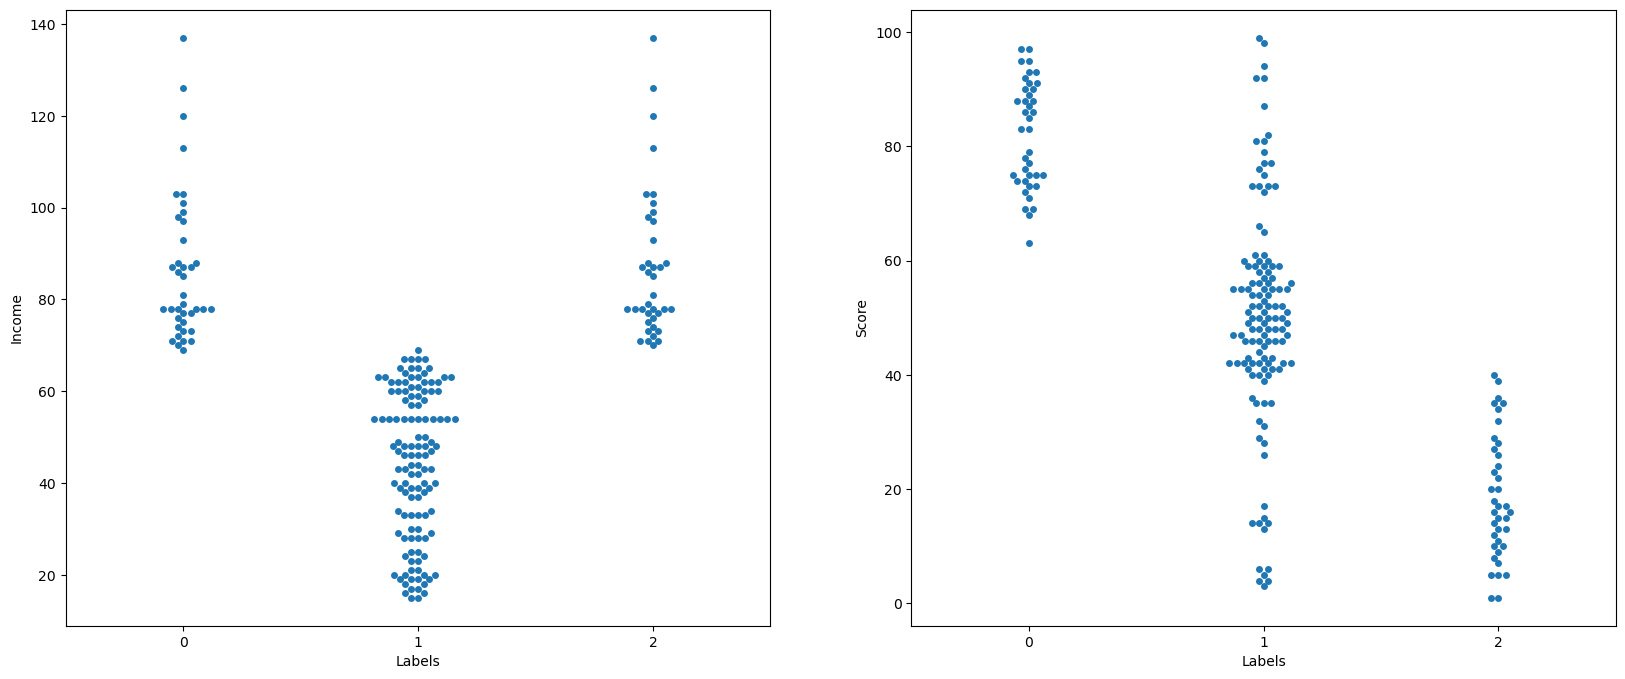

In [28]:
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(121)
sns.swarmplot(x='Labels',y='Income',data=df,ax=ax)
ax=fig.add_subplot(122)
sns.swarmplot(x='Labels',y='Score',data=df,ax=ax)
plt.show()

## Hierarchique

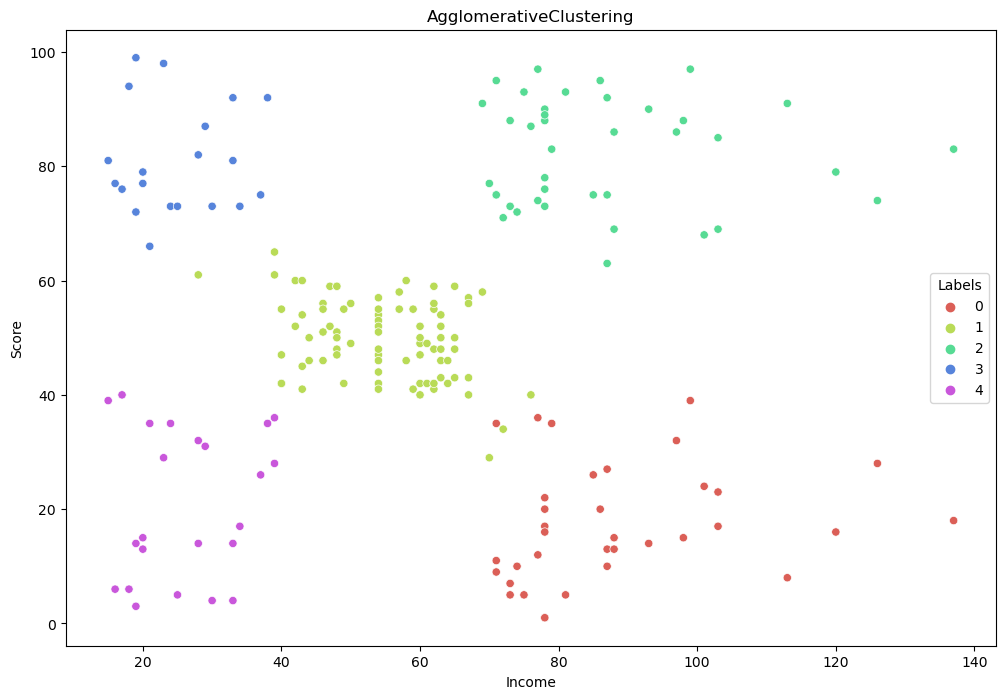

In [54]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,linkage='complete')
model.fit(df)

df['Labels']=model.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Income'],y=df['Score'],
hue=df['Labels'],palette=sns.color_palette('hls',5))
plt.title('AgglomerativeClustering')
plt.show()

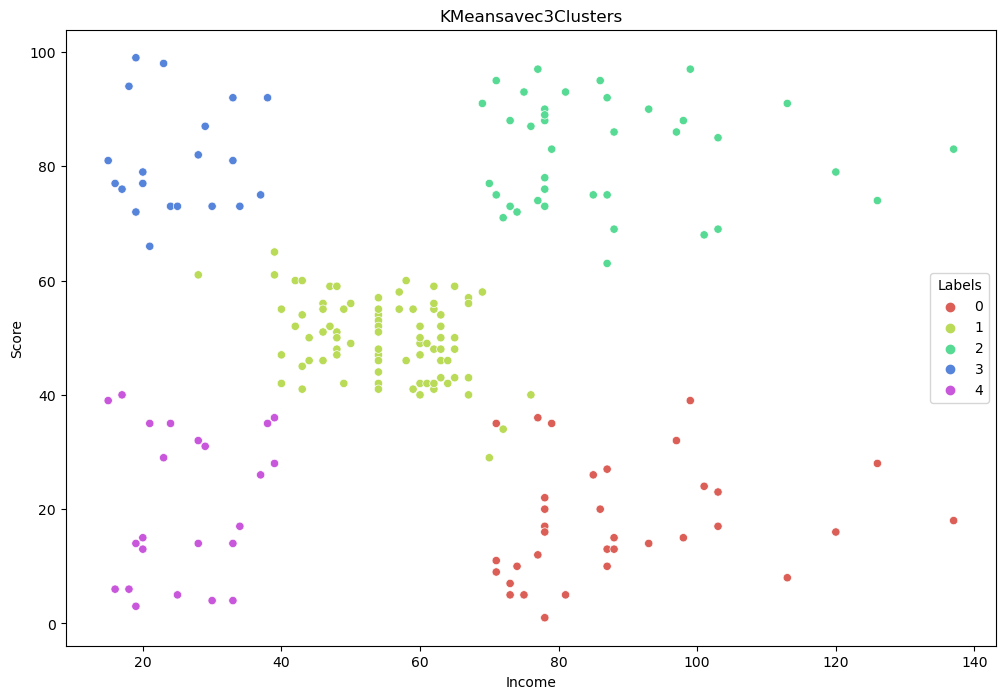

/tmp/ipykernel_101020/3496927844.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z=hierarchy.linkage(dist)


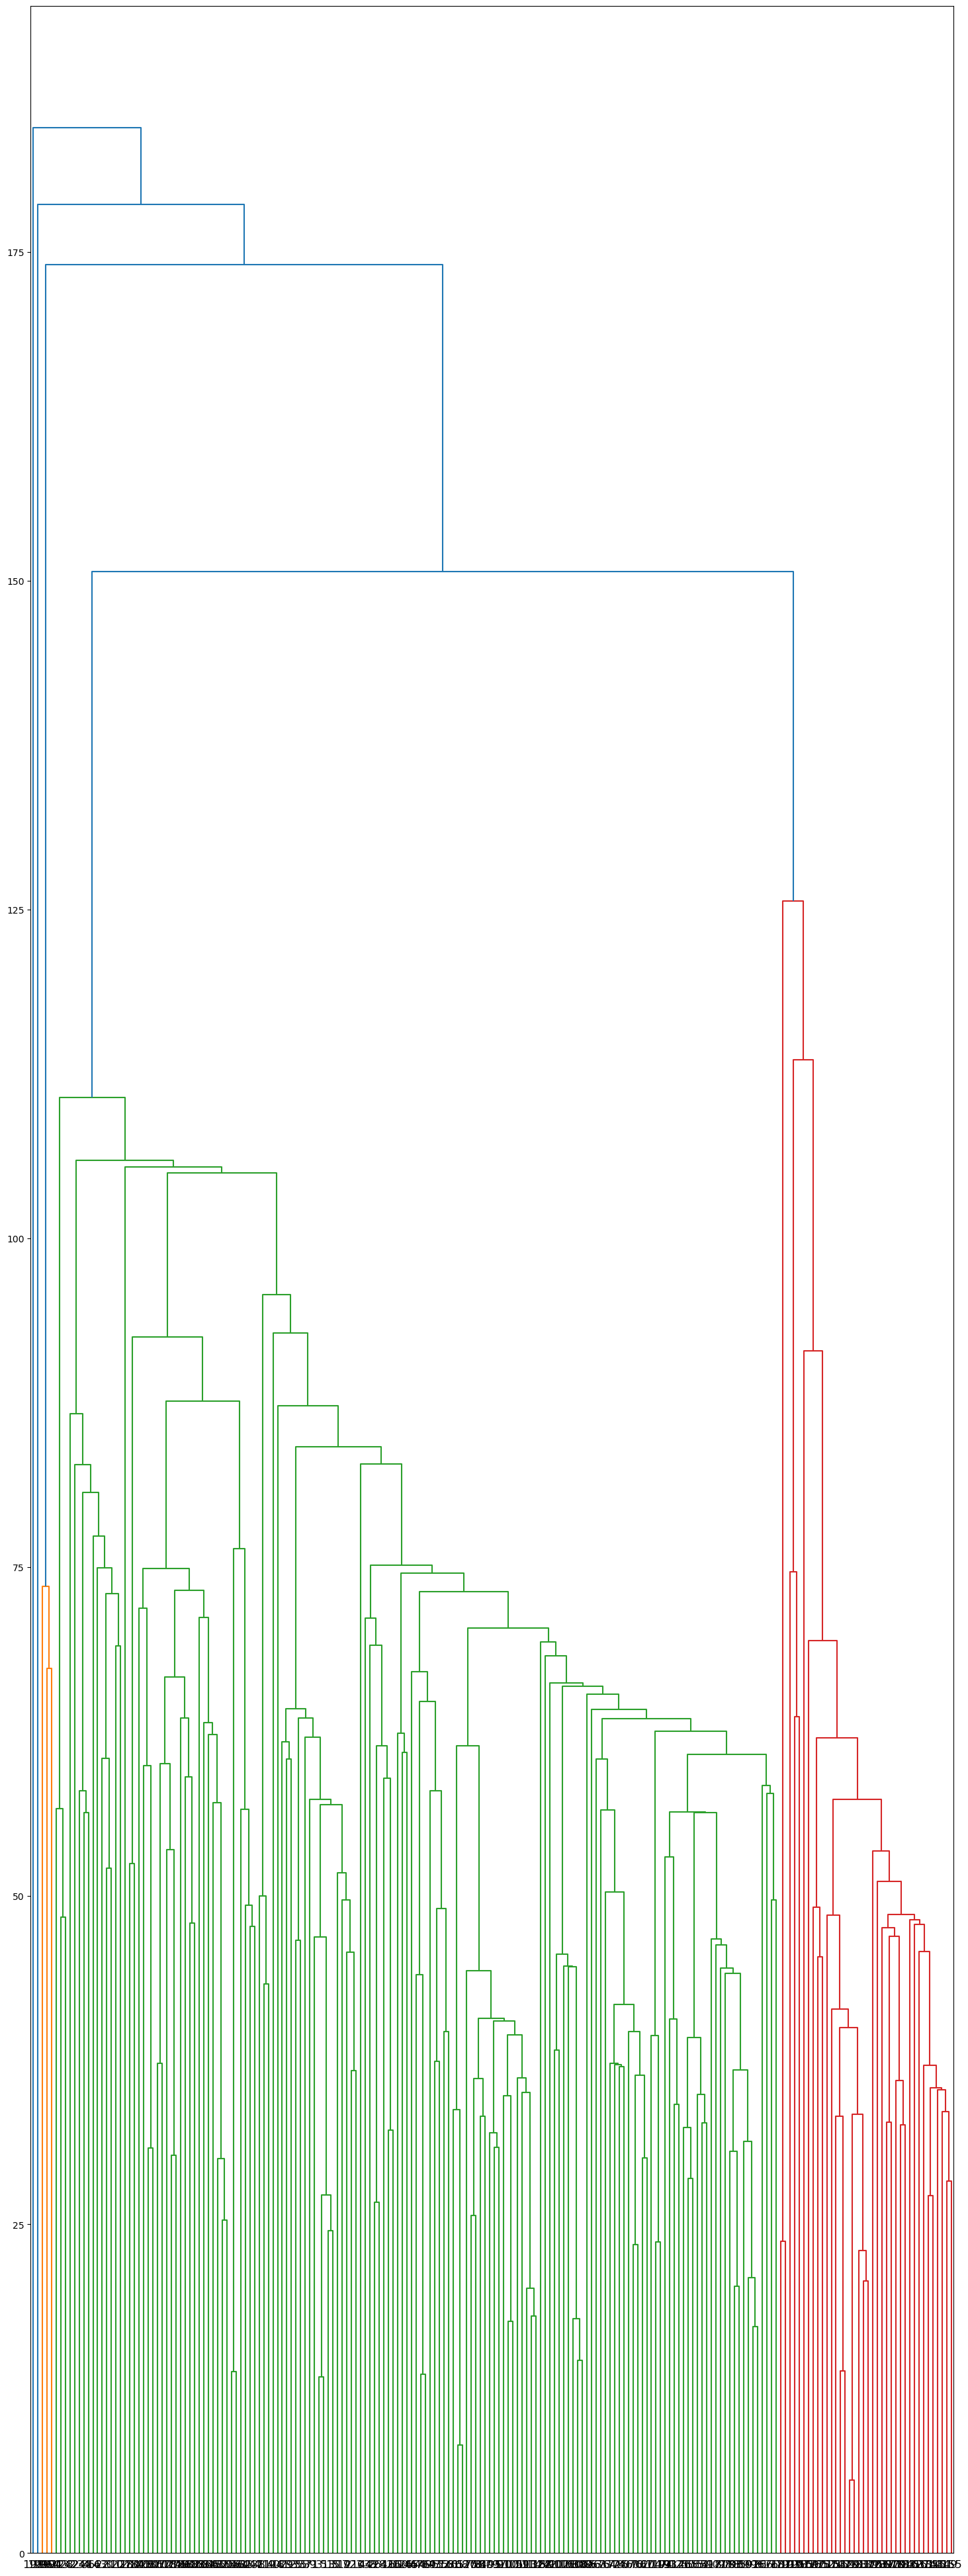

In [70]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
dist=distance_matrix(df,df)
Z=hierarchy.linkage(dist)
plt.figure(figsize=(18,50))
dendro=hierarchy.dendrogram(Z,leaf_rotation=0,leaf_font_size=12,p=10)


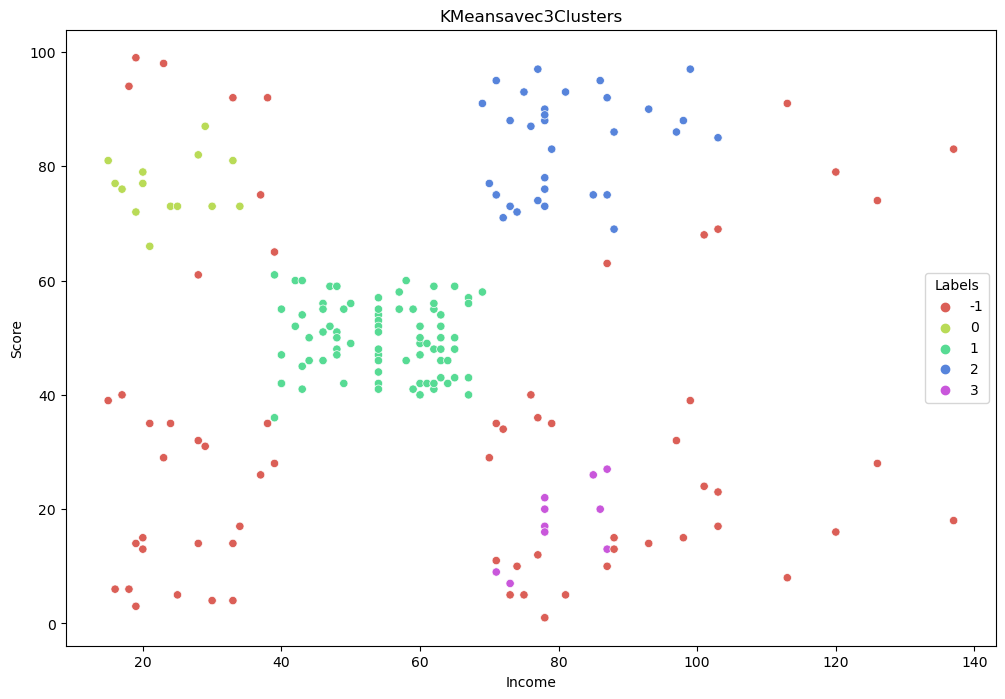

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2, -1,  2, -1,  2, -1,  2,  3,  2, -1,  2, -1,  2,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3,
        2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3, -1,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [85]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=11,min_samples=6)
model.fit(df)

df['Labels']=model.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['Income'],y=df['Score'],
hue=df['Labels'],palette=sns.color_palette('hls',5))
plt.title('KMeansavec3Clusters')
plt.show()
model.labels_

-1: 

In [55]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [88]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df,model.labels_)

2.1845087741313414

In [89]:
help(davies_bouldin_score)

Help on function davies_bouldin_score in module sklearn.metrics.cluster._unsupervised:

davies_bouldin_score(X, labels)
    Compute the Davies-Bouldin score.
    
    The score is defined as the average similarity measure of each cluster with
    its most similar cluster, where similarity is the ratio of within-cluster
    distances to between-cluster distances. Thus, clusters which are farther
    apart and less dispersed will result in a better score.
    
    The minimum score is zero, with lower values indicating better clustering.
    
    Read more in the :ref:`User Guide <davies-bouldin_index>`.
    
    .. versionadded:: 0.20
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        A list of ``n_features``-dimensional data points. Each row corresponds
        to a single data point.
    
    labels : array-like of shape (n_samples,)
        Predicted labels for each sample.
    
    Returns
    -------
    score: float
        The resulting